In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
import datetime as td
pd.set_option('display.max_columns', None)

## Septimo Plot
### Histogramas

In [3]:
file_stats = "SQMStats_Pangamos_20210830-20220203v3.xlsx"
df = pd.read_excel(file_stats)
df_mop = df[(df["Producto"].notna()) & (df["Producto"].str.contains("MOP")) 
            & df["Hora Ingreso a Puerto"].notna() & df["Hora Legada a Espera"].notna()]
df_mop.shape

(3218, 32)

In [4]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking],Parqueo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cols = df_mop.columns
cols = cols[~(cols.str.contains("Unnamed"))]
df_mop = df_mop[cols]

In [6]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking]


In [7]:
df_mop["Hora Legada a Espera"] = pd.to_datetime(df_mop["Hora Legada a Espera"])

In [8]:
df_mop["Hora Ingreso a Puerto"] = pd.to_datetime(df_mop["Hora Ingreso a Puerto"])

In [9]:
df_mop["Hora Legada a Espera"][0].time() < td.time(8,30,0)

False

In [10]:
def Minutos_Sobrantes(t):
    if t.time() < td.time(8,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(14,0,0):
        return 0.
    elif t.time() < td.time(15,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 15, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(22,30,0):
        return 0.
    else:
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0) + td.timedelta(days=1)
        dt = (t_aux - t).total_seconds()/60.
        return dt

In [11]:
df_mop["Minutos Sobrantes"] = df_mop["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))

In [12]:
df_mop["Tiempo Espera Limpio"] = df_mop["Tiempo Espera [minutos]"] - df_mop["Minutos Sobrantes"] 

In [13]:
T_esp = df_mop["Tiempo Espera Limpio"][df_mop["Tiempo Espera Limpio"]>0]

In [14]:
Bins = [15*i for i in range(16)]
h, b = np.histogram(T_esp, bins=Bins)

In [15]:
#bins = ["0-"+str(round(b[0]))]
bins = []
for i in range(len(b[:-1])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))
bins = np.array(bins)

<ipython-input-16-155929ef392b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bins, rotation = 45, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,


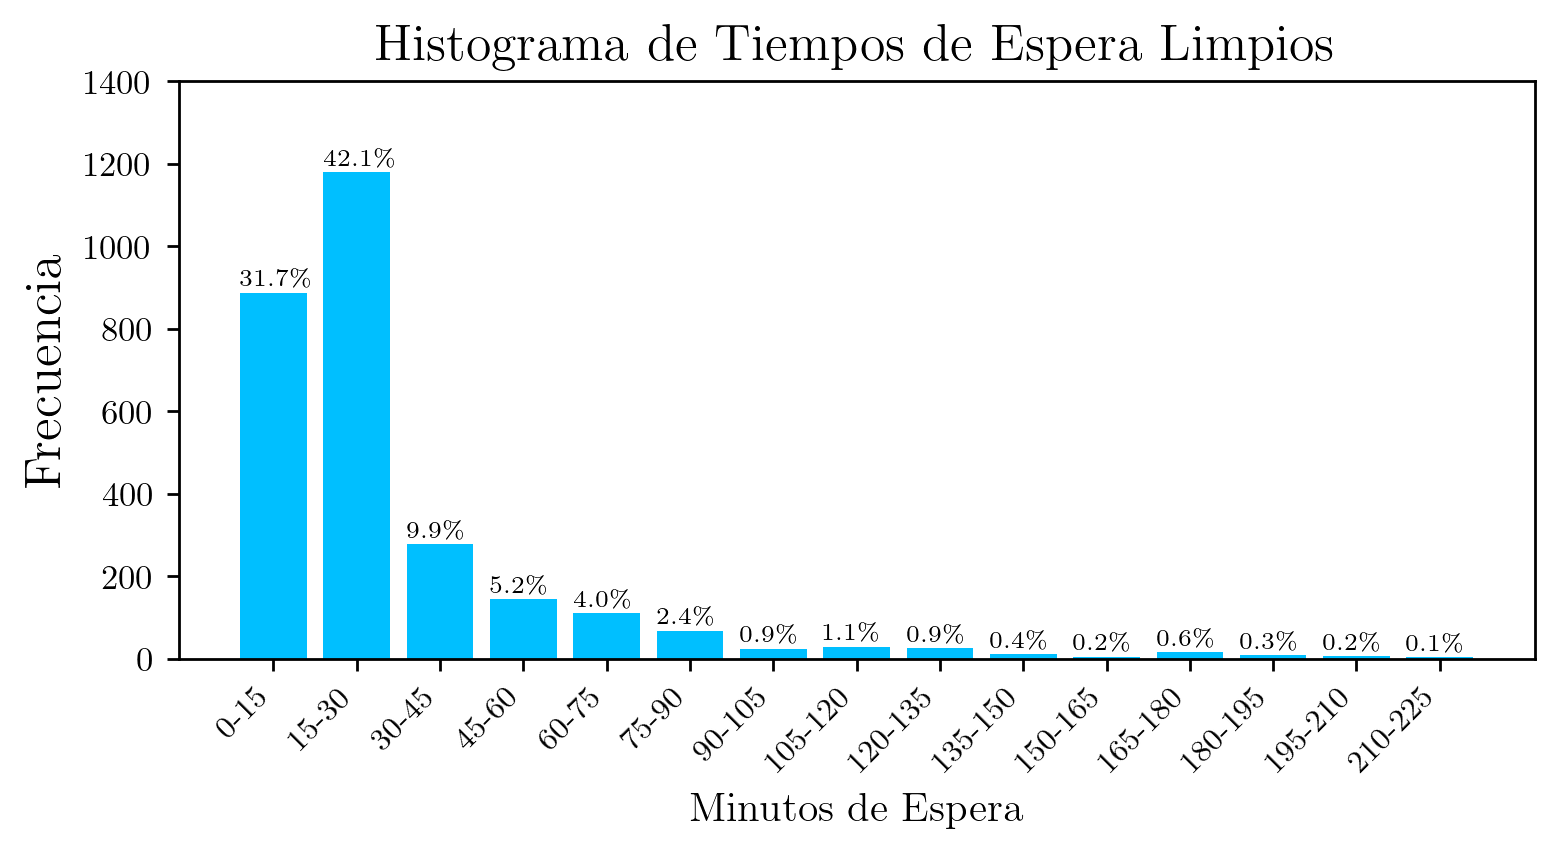

In [16]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera Limpios", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

#ax2.set_xticks(idx_sem)
ax2.set_xticklabels(bins, rotation = 45, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,
ax2.set_xlabel("Minutos de Espera", fontsize = 12)
ax2.set_ylim([0,1400])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+15.5), fontsize = 7)

plt.savefig("Graficos/Histograma de Tiempos de Espera Limpios.png", bbox_inches= "tight")

In [17]:
 df_mop["Tiempo Espera Limpio (min)"] = df_mop.apply(lambda x: x["Tiempo Espera [minutos]"] if x["Tiempo Espera Limpio"] < 0 else x["Tiempo Espera Limpio"], axis = 1)

In [18]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min)
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333


In [19]:
T_espera = df_mop["Tiempo Espera Limpio (min)"]

In [20]:
Bins = [15*i for i in range(16)]
Bins.append(780)
h, b = np.histogram(T_espera, bins=Bins)

In [21]:
#bins = ["0-"+str(round(b[0]))]
bins = []
for i in range(len(b[:-1])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))
bins = np.array(bins)

<ipython-input-22-60a6c32b3f47>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bins, rotation = 45, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,


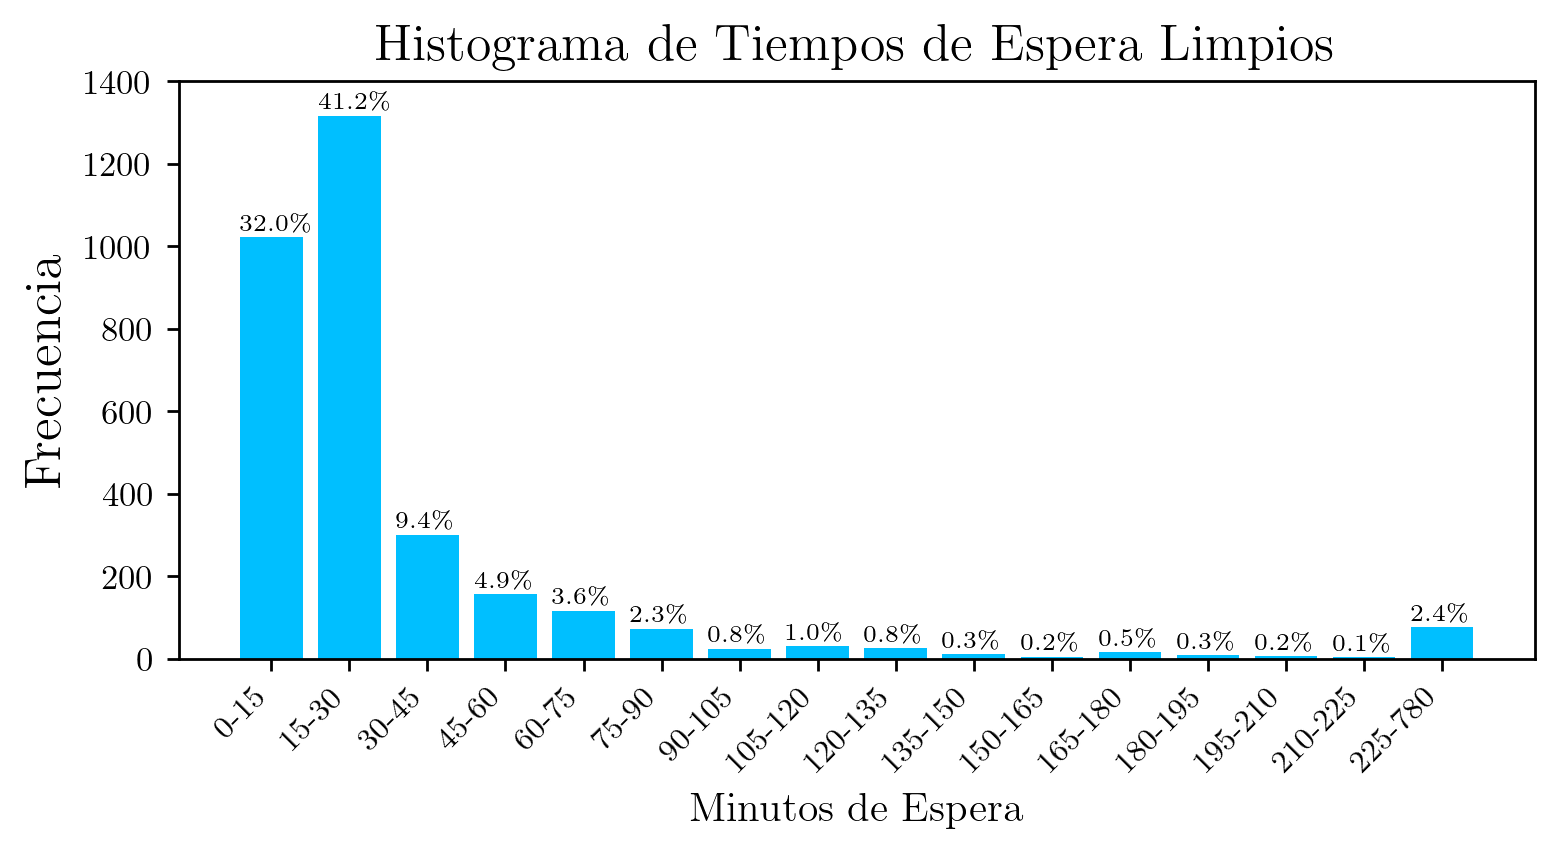

In [22]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera Limpios", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

#ax2.set_xticks(idx_sem)
ax2.set_xticklabels(bins, rotation = 45, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,
ax2.set_xlabel("Minutos de Espera", fontsize = 12)
ax2.set_ylim([0,1400])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+15.5), fontsize = 7)

plt.savefig("Graficos/Histograma de Tiempos de Espera Limpios V2.png", bbox_inches= "tight")

In [23]:
T_espera[T_espera > 60].sum()/60.

1647.3441666667052

In [24]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min)
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333


## Noveno Plot

In [25]:
df_mop["Rango Hora en Puerto"] = df_mop["Hora Ingreso a Puerto"].apply(lambda x: str(x.time().hour)+"-"+str(x.time().hour+1))

In [26]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min),Rango Hora en Puerto
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333,8-9


In [27]:
df_mop.groupby("Rango Hora en Puerto").mean()

,Tiempo Espera [minutos],Tiempo Total en Puerto,Tiempo total Descarga,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min)
Rango Hora en Puerto,,,,,,
0-1,33.545333,107.328000,46.904667,505.396667,-471.851333,33.545333
10-11,130.440290,81.531522,51.898913,40.613551,89.826739,89.826739
11-12,103.342239,67.251961,48.993873,42.668873,60.673366,60.673366
12-13,47.004545,68.448565,49.683493,5.158134,41.846411,41.846411
13-14,30.327363,85.612935,72.220315,0.000000,30.327363,30.327363
14-15,20.317519,78.989612,66.594419,44.844341,-24.526822,20.317519
15-16,29.306901,77.499870,57.306641,28.089583,1.217318,17.385156
16-17,28.147552,71.043182,58.454312,5.695338,22.452214,23.764860
17-18,19.938406,63.204992,52.297907,0.109903,19.828502,19.828502


In [28]:
df_mop["Rango Hora Llegada a Espera"] = df_mop["Hora Legada a Espera"].apply(lambda x: str(x.time().hour)+"-"+str(x.time().hour+1))

In [29]:
x = list(df_mop.groupby("Rango Hora Llegada a Espera").mean().index)
y = list(df_mop.groupby("Rango Hora Llegada a Espera").mean()["Tiempo Espera Limpio (min)"])

In [30]:
xx = x[:2] + [x[12]] + x[17:] + x[2:12] + x[13:17]
yy = y[:2] + [y[12]] + y[17:] + y[2:12] + y[13:17]

In [31]:
xx = np.array(xx)
yy = np.array(yy)

In [32]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min),Rango Hora en Puerto,Rango Hora Llegada a Espera
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333,8-9,19-20


In [33]:
N_CAM = np.array([df_mop[df_mop["Rango Hora Llegada a Espera"] == i].shape[0] for i in xx])

In [34]:
pond = (yy*N_CAM).sum()/N_CAM.sum() 

<ipython-input-39-a97641a58594>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xx, rotation = 35, fontdict = {"horizontalalignment": "right"})


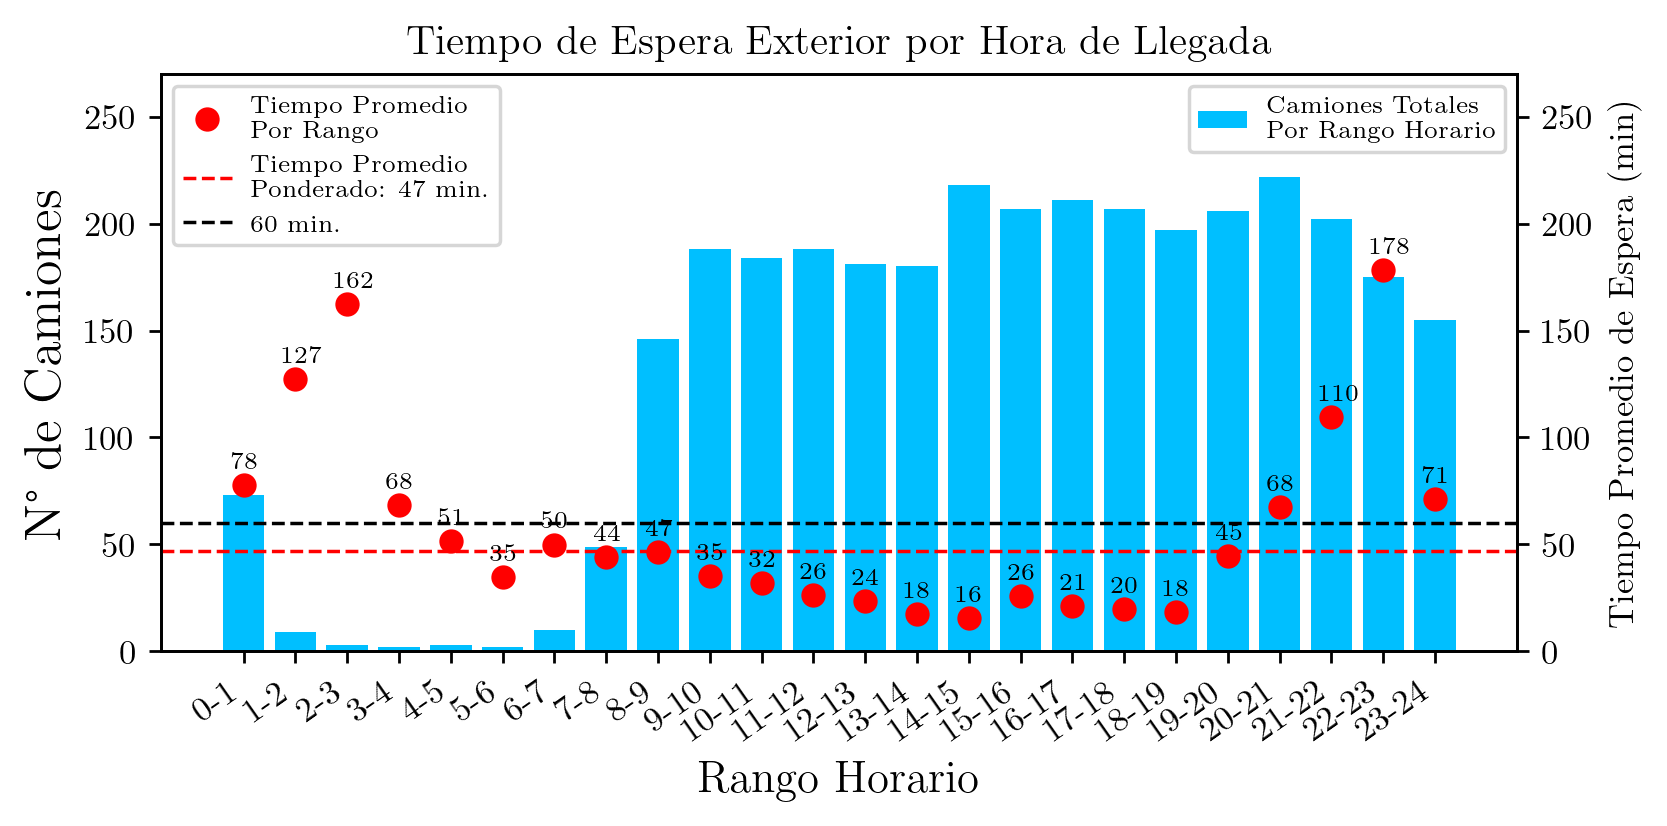

In [39]:
parameters = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(xx, N_CAM, label = "Camiones Totales \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Tiempo de Espera Exterior por Hora de Llegada", fontsize = 12)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.legend(loc = "upper right",fontsize = 7)

ax1.set_xticklabels(xx, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,270])
#ax2.legend(fontsize = 7)



ax2 = ax1.twinx() 

ax2.plot(xx, yy, "ro", label = "Tiempo Promedio \n Por Rango")
ax2.set_ylabel("Tiempo Promedio de Espera (min)", fontsize = 10)
ax2.axhline(y = pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Ponderado: "+ str(round(pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 min.")

ax2.set_ylim([0,270])
ax2.legend(loc = "upper left",fontsize = 7)



for i, label in enumerate(yy):
    plt.annotate(str(round(label)), (i-0.25, yy[i]+7.9), fontsize = 7)


plt.savefig("Graficos/Tiempos de Espera Por Hora de LLegada.png", bbox_inches= "tight")

## Penultimo Plot

In [36]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min),Rango Hora en Puerto,Rango Hora Llegada a Espera
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333,8-9,19-20


In [37]:
rangos = xx
N_llegada = np.array([df_mop[df_mop["Rango Hora Llegada a Puerto"] == i].shape[0] for i in rangos])

KeyError: 'Rango Hora Llegada a Puerto'

NameError: name 'N_llegada' is not defined

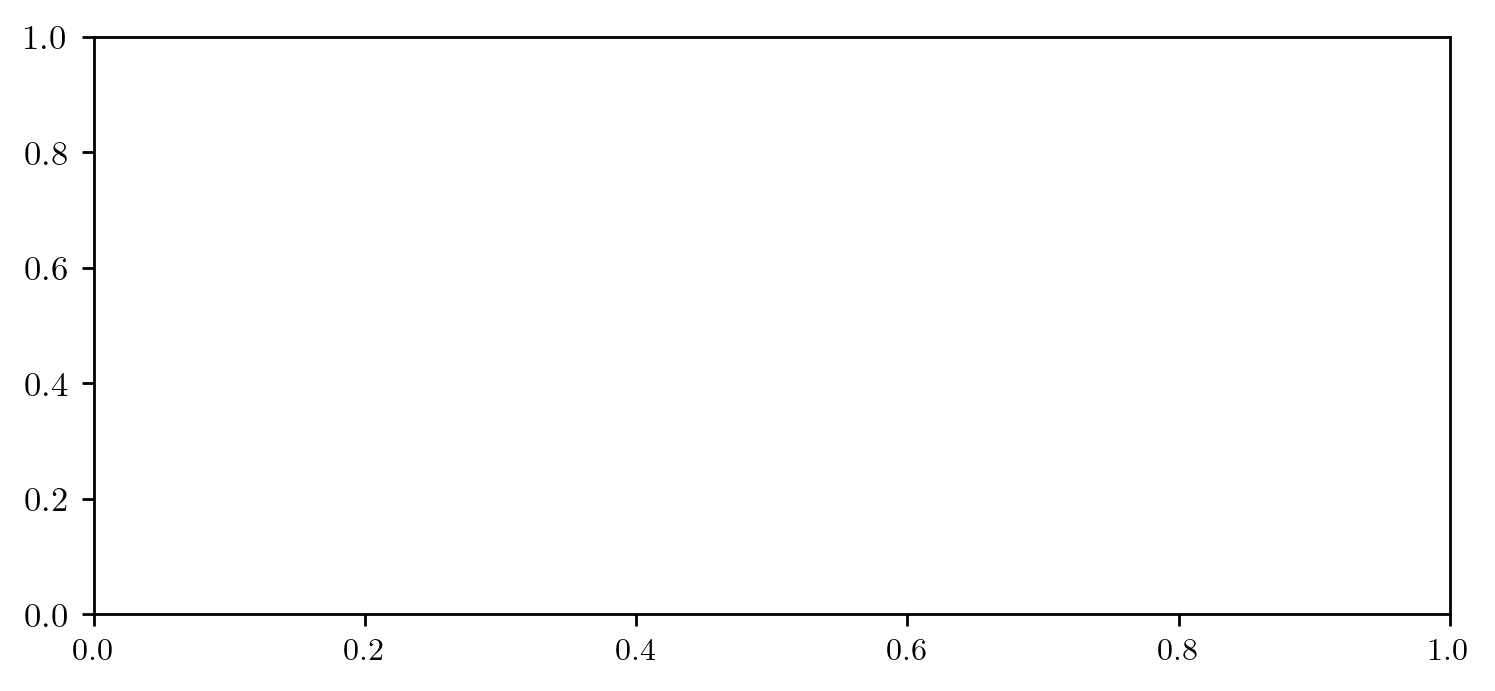

In [38]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(rangos, N_llegada, label = "Tiempo Promedio \n Por Día", color = "deepskyblue")
ax2.set_title("Camiones Totales Llegando a Espera Exterior por Rango Horario", fontsize = 12)
ax2.set_ylabel("N° de Camiones", fontsize = 12)
ax2.set_xlabel("Rango Horario", fontsize = 12)

ax2.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "center"})

ax2.set_ylim([0,260])
#ax2.legend(fontsize = 7)


for i, label in enumerate(N_llegada):
    plt.annotate(str(round(label)), (i-0.3, N_llegada[i]+2.5), fontsize = 7)


#plt.savefig("Graficos/Camiones en Espera Por Hora de LLegada.png", bbox_inches= "tight")

## Ultimo Plot

In [34]:
df_mop["Fecha Llegada a Espera"] = df_mop["Hora Legada a Espera"].apply(lambda x: x.date())

In [35]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Minutos Sobrantes,Tiempo Espera Limpio,Tiempo Espera Limpio (min),Rango Hora en Puerto,Rango Hora Llegada a Puerto,Fecha Llegada a Espera
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],0.0,752.233333,752.233333,8-9,19-20,2021-08-30


In [36]:
fechas = df_mop["Fecha Llegada a Espera"].unique()
fechas

array([datetime.date(2021, 8, 30), datetime.date(2021, 8, 31),
       datetime.date(2021, 9, 1), datetime.date(2021, 9, 2),
       datetime.date(2021, 9, 3), datetime.date(2021, 9, 4),
       datetime.date(2021, 9, 5), datetime.date(2021, 9, 6),
       datetime.date(2021, 9, 7), datetime.date(2021, 9, 8),
       datetime.date(2021, 9, 23), datetime.date(2021, 9, 24),
       datetime.date(2021, 9, 25), datetime.date(2021, 9, 26),
       datetime.date(2021, 9, 27), datetime.date(2021, 9, 28),
       datetime.date(2021, 9, 29), datetime.date(2021, 9, 30),
       datetime.date(2021, 10, 1), datetime.date(2021, 10, 2),
       datetime.date(2021, 10, 3), datetime.date(2021, 10, 4),
       datetime.date(2022, 1, 17), datetime.date(2022, 1, 18),
       datetime.date(2022, 1, 19), datetime.date(2022, 1, 20),
       datetime.date(2022, 1, 21), datetime.date(2022, 1, 22),
       datetime.date(2022, 1, 23), datetime.date(2022, 1, 24),
       datetime.date(2022, 1, 25), datetime.date(2022, 1, 26),


In [37]:
cam_prom = [[] for i in rangos]
for i in range(len(rangos)):
    for j in range(len(fechas)):
        cam_prom[i].append(df_mop[(df_mop["Rango Hora en Puerto"] == rangos[i]) & (df_mop["Fecha Llegada a Espera"] == fechas[j])].shape[0])

In [38]:
cam_promedio = np.array([np.array(i).mean() for i in cam_prom])

In [39]:
cam_max = np.array([np.array(i).max() for i in cam_prom])

In [40]:
rangos_less = []
camiones_promedio = []
for i in range(len(rangos)):
    if cam_promedio[i] > 0.01:
        rangos_less.append(rangos[i])
        camiones_promedio.append(cam_promedio[i])

<ipython-input-41-27e7b49d0241>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "center"})


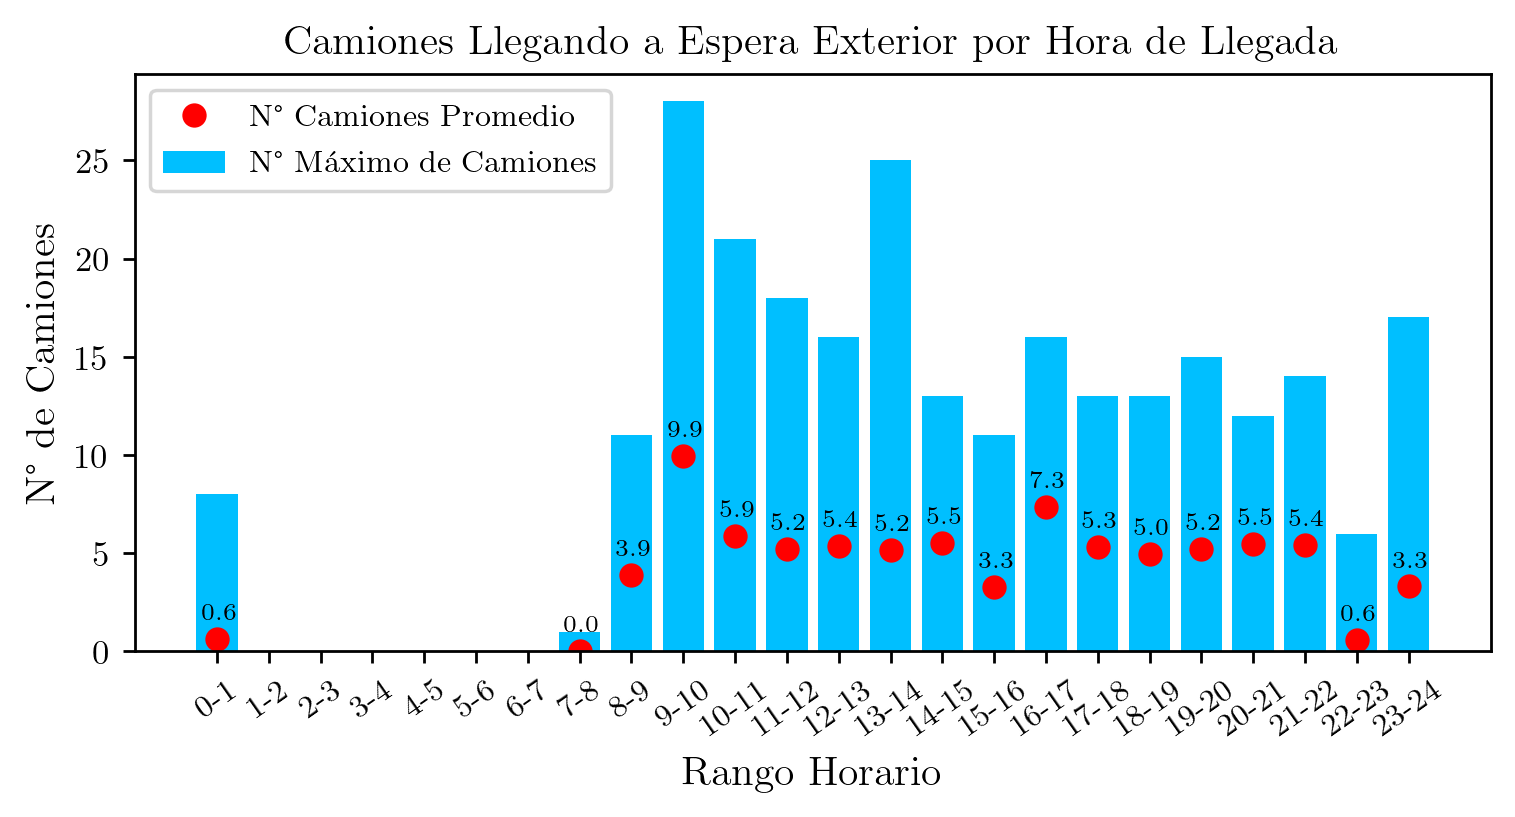

In [41]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(rangos, cam_max, label = "N° Máximo de Camiones", color = "deepskyblue")
ax2.set_title("Camiones Llegando a Espera Exterior por Hora de Llegada", fontsize = 12)
ax2.set_ylabel("N° de Camiones", fontsize = 12)
ax2.set_xlabel("Rango Horario", fontsize = 12)

ax2.plot(rangos_less, camiones_promedio, "ro", label = "N° Camiones Promedio")



ax2.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "center"})

#ax2.set_ylim([0,12])
ax2.legend(fontsize = 9, loc = "upper left")


for i, label in enumerate(cam_promedio):
    if label > 0:
        plt.annotate(str(round(label,1)), (i-0.3, cam_promedio[i]+1), fontsize = 7)


plt.savefig("Graficos/Promedio y Maximo de Camiones en Espera Por Hora de LLegada.png", bbox_inches= "tight")